<a href="https://colab.research.google.com/github/Saransh-khandelwal-123/CODSOFT-ML/blob/main/SALES_PREDICTION_BY_SARANSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/advertising.csv")

In [123]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [124]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [125]:
df.groupby('Sales').mean()

,TV,Radio,Newspaper
Sales,,,
1.6,0.70,39.600000,8.7
3.2,4.10,11.600000,5.7
4.8,8.60,2.100000,1.0
5.3,9.25,15.150000,17.5
5.5,7.30,28.100000,41.4
...,...,...,...
24.7,220.30,49.000000,3.2
25.4,266.60,45.033333,33.5
25.5,283.60,42.000000,66.2


In [126]:
df.groupby('Sales').max()

,TV,Radio,Newspaper
Sales,,,
1.6,0.7,39.6,8.7
3.2,4.1,11.6,5.7
4.8,8.6,2.1,1.0
5.3,13.1,29.9,25.6
5.5,7.3,28.1,41.4
...,...,...,...
24.7,220.3,49.0,3.2
25.4,289.7,49.0,51.2
25.5,283.6,42.0,66.2


In [127]:
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

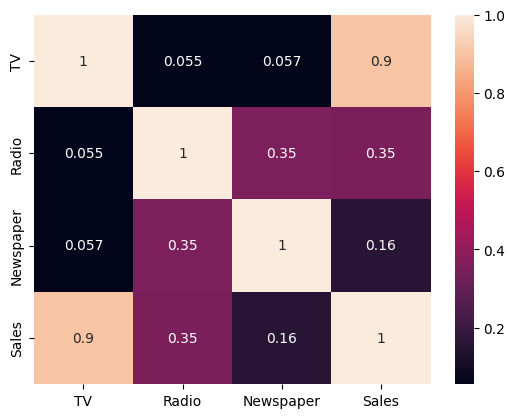

In [128]:
sns.heatmap(df.corr(), annot=True)
plt.show()

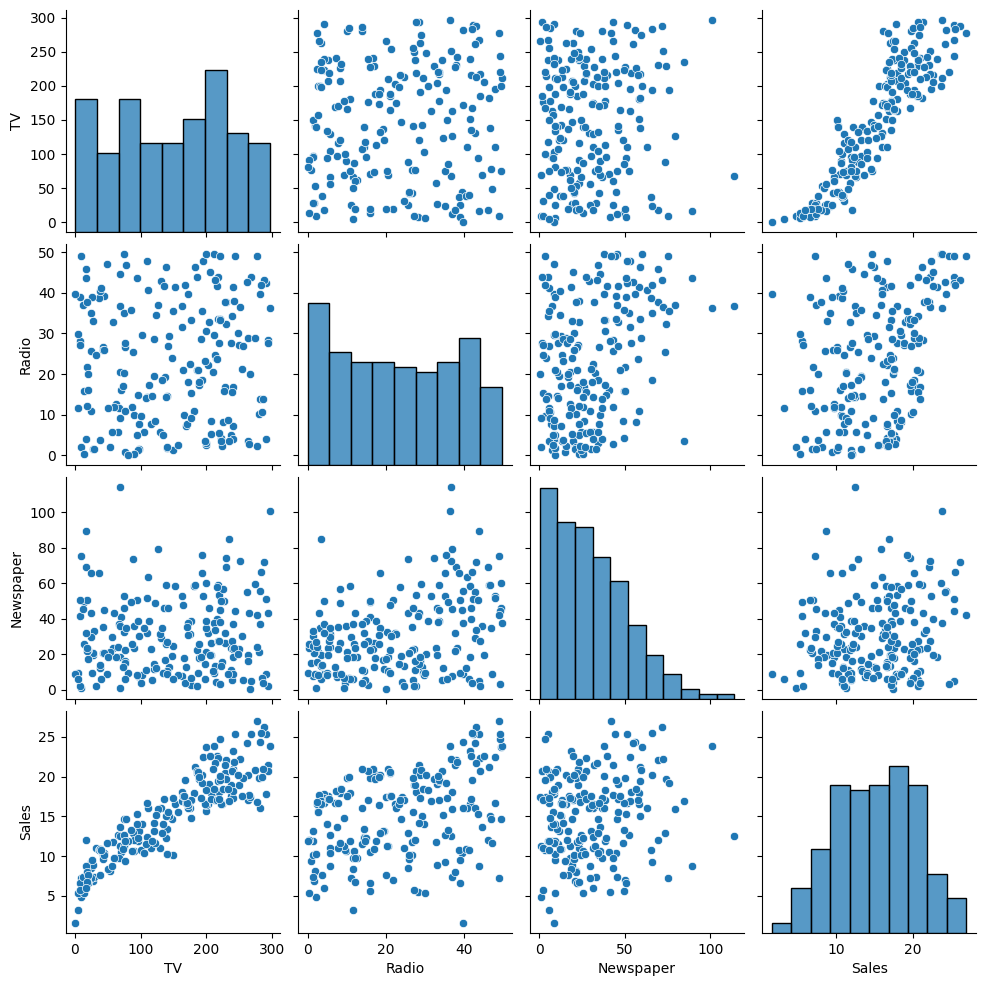

In [129]:
sns.pairplot(df)

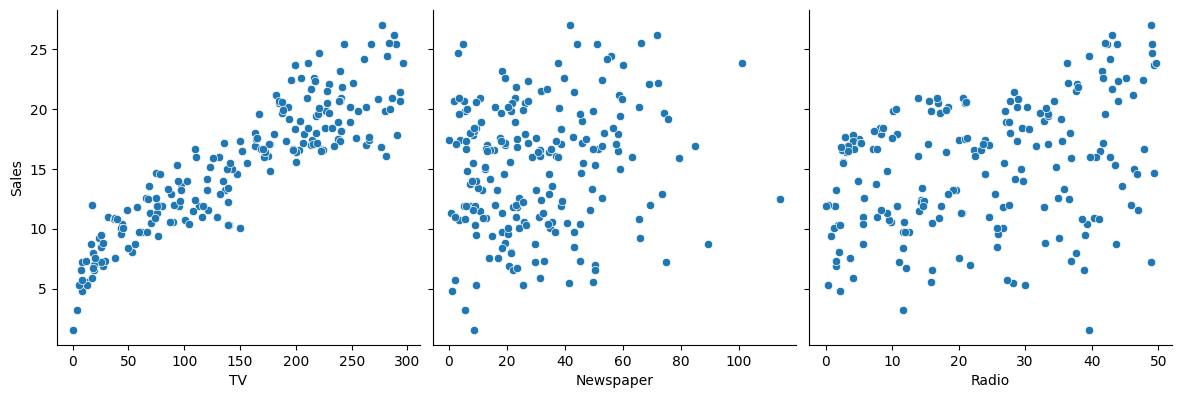

In [130]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [131]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(10)

<ipython-input-131-d7fccfd674a3>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(10)


,TV,Radio,Newspaper,Sales
TV,1.0000000000,0.0548086645,0.0566478750,0.9012079133
Radio,0.0548086645,1.0000000000,0.3541037508,0.3496310970
Newspaper,0.0566478750,0.3541037508,1.0000000000,0.1579600262
Sales,0.9012079133,0.3496310970,0.1579600262,1.0000000000


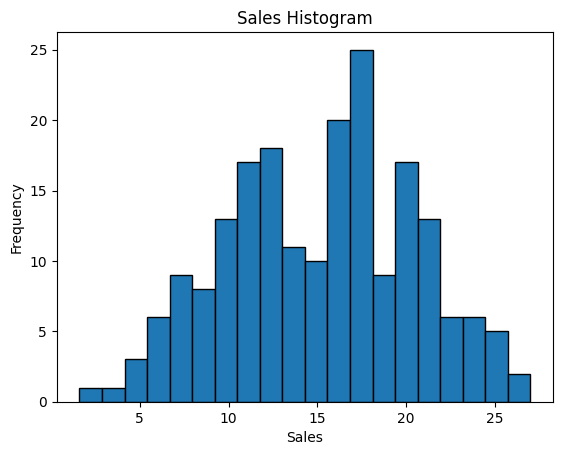

In [132]:
# Draw a histogram for the 'sales' variable
X = df.drop('Sales', axis=1)
y = df['Sales']
plt.hist(y, bins=20, edgecolor='black')  # You can adjust the number of bins as per your preference
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Histogram')
plt.show()

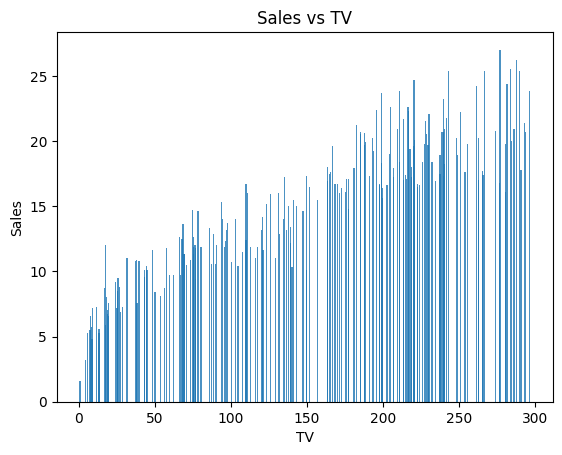

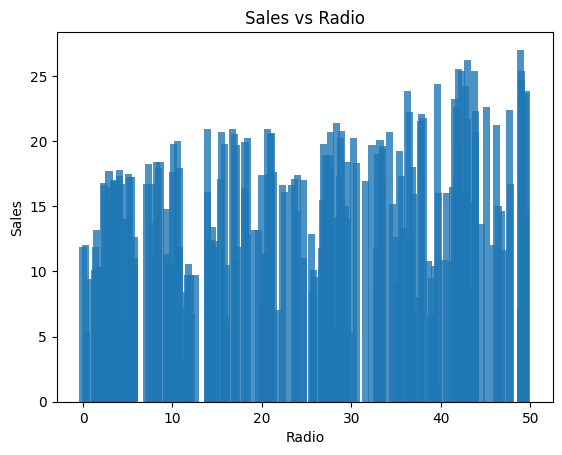

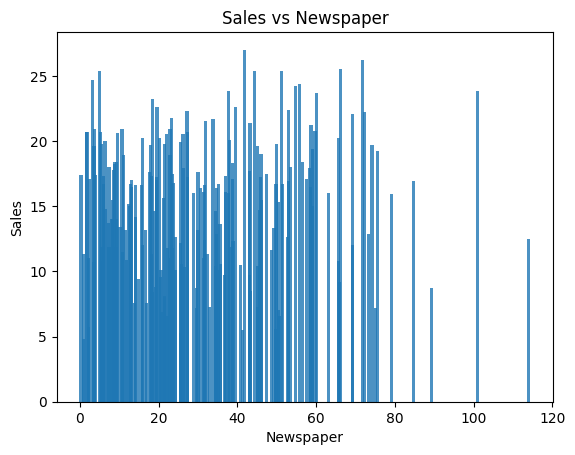

In [133]:
# Draw a bar graph for each feature against sales
for feature in X.columns:
    plt.bar(X[feature], y, alpha=0.8)
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(f'Sales vs {feature}')
    plt.show()

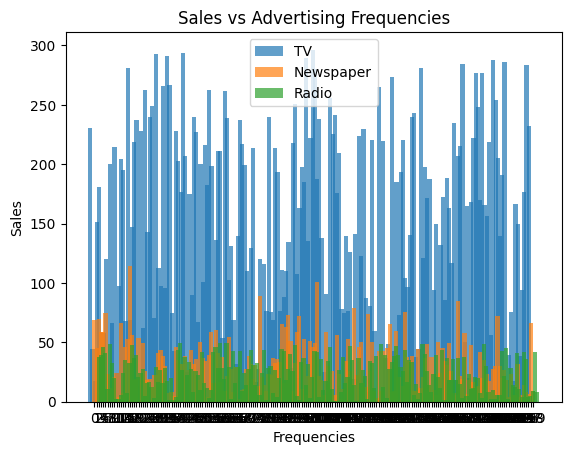

In [134]:
# Let's say 'TV', 'Newspaper', 'Radio', and 'sales' are columns in the DataFrame
X = df[['TV', 'Newspaper', 'Radio']]
y = df['Sales']

# Create a grouped bar chart for 'TV', 'Newspaper', and 'Radio' frequencies against 'sales'
fig, ax = plt.subplots()
bar_width = 1.9
index = np.arange(len(X))

bar1 = ax.bar(index, X['TV'], bar_width, alpha=0.7, label='TV')
bar2 = ax.bar(index + bar_width, X['Newspaper'], bar_width, alpha=0.7, label='Newspaper')
bar3 = ax.bar(index + 2*bar_width, X['Radio'], bar_width, alpha=0.7, label='Radio')

# Set the positions and labels for the ticks
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df.index)  # Assuming you have row labels in your data (e.g., '1', '2', '3', ...)

ax.set_xlabel('Frequencies')
ax.set_ylabel('Sales')
ax.set_title('Sales vs Advertising Frequencies')
ax.legend()

plt.show()

In [135]:
# Let's say 'TV', 'Newspaper', 'Radio', and 'sales' are columns in the DataFrame
X = df[['TV', 'Newspaper', 'Radio']]
y = df['Sales']

In [136]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared (R^2): 0.91


In [143]:
# Create a Decision Tree Regression model and fit it to the training data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)  # Specify feature names to avoid the warning

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Example of using the model to predict sales for a new set of features
new_features = np.array([[100, 50, 30]])  # For example, advertising frequencies for TV, Newspaper, and Radio
predicted_sales = model.predict(new_features)
print(f"Predicted Sales for New Features: {predicted_sales[0]:.2f}")

Mean Squared Error (MSE): 2.79
Root Mean Squared Error (RMSE): 1.67
R-squared (R^2): 0.91
Predicted Sales for New Features: 14.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [147]:
# Create a Random Forest Regressor model and fit it to the training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Example of using the model to predict sales for a new set of features
new_features = np.array([[100, 50, 30]])  # For example, advertising frequencies for TV, Newspaper, and Radio
predicted_sales = model.predict(new_features)
print(f"Predicted Sales for New Features: {predicted_sales[0]:.2f}")


Mean Squared Error (MSE): 1.34
Root Mean Squared Error (RMSE): 1.16
R-squared (R^2): 0.96
Predicted Sales for New Features: 14.39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
